In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
%matplotlib inline 
sns.set(style="ticks")

# РК1
## Тема: Методы обработки данных.
## Студент: Волков Артём Сергеевич
## Группа: ИУ5-23М
## Номер по списку группы (вариант): 4
### Вариант задачи №1 - 4
Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "label encoding".

### Вариант задачи №2 - 24
Для набора данных для одного (произвольного) числового признака проведите обнаружение и удаление выбросов на основе 5% и 95% квантилей.

### Дополнительное задание (по группам)
Для произвольной колонки данных построить график "Ящик с усами (boxplot)".

# Задача 1 (№4)
Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "label encoding".

> Загрузка набора данных с характеристиками самолетов

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/datasets/Aiplane_BlueBook.csv')
data.head()

,Model,Company,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng service ceiling,Eng out service ceiling,...,Takeoff over 50ft,Takeoff ground run,Landing over 50ft,Landing ground roll,Gross weight lbs,Empty weight lbs,Length ft/in,Height ft/in,Wing span ft/in,Range N.M.
0,15 AC Sedan,Aeronca,Piston,145,104,91,46,36.0,13000.0,NaN,...,900.0,NaN,1300.0,NaN,2050,1180,25/3,10/3,37/5,370
1,11 CC Super Chief,Aeronca,Piston,85,89,83,44,15.0,12300.0,NaN,...,720.0,NaN,800.0,NaN,1350,820,20/7,8/9,36/1,190
2,7 CCM Champ,Aeronca,Piston,90,90,78,37,19.0,16000.0,NaN,...,475.0,NaN,850.0,NaN,1300,810,21/5,8/7,35/0,210
3,7 DC Champ,Aeronca,Piston,85,88,78,37,19.0,13000.0,NaN,...,500.0,NaN,850.0,NaN,1300,800,21/5,8/7,35/0,210
4,7 AC Champ,Aeronca,Piston,65,83,74,33,14.0,12500.0,NaN,...,632.0,NaN,885.0,NaN,1220,740,21/5,8/9,35/0,175


> Удаление всех пропусков

In [ ]:
data = data.dropna(axis = 0, thresh = 22)

> Все пропуски удалены:

In [ ]:
data.isna().sum()

Model                      0
Company                    0
Engine Type                0
HP or lbs thr ea engine    0
Max speed Knots            0
Rcmnd cruise Knots         0
Stall Knots dirty          0
Fuel gal/lbs               0
All eng service ceiling    0
Eng out service ceiling    0
All eng rate of climb      0
Eng out rate of climb      0
Takeoff over 50ft          0
Takeoff ground run         0
Landing over 50ft          0
Landing ground roll        0
Gross weight lbs           0
Empty weight lbs           0
Length ft/in               0
Height ft/in               0
Wing span ft/in            0
Range N.M.                 0
dtype: int64

> Импорт `LabelEncoder` для использования при преобразовании категорильных данных

In [ ]:
from sklearn.preprocessing import LabelEncoder

> "Обучение" `LabelEncoder` для преобразования значений колонки `Engine Type` ("тип двигателя")

In [ ]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(data['Engine Type'])

> Значения колонки `Engine Type` до преобразования:

In [ ]:
data['Engine Type'].unique()

array(['Piston', 'Propjet', 'Jet', 'piston', 'Pistion', 'TSIO 520',
       'IO550', 'PT6A-35', 'PT6A-21'], dtype=object)

> Значения колонки `Engine Type` до преобразования:

In [ ]:
np.unique(cat_enc_le)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

> Обратное преобразование значений колонки:

In [ ]:
le.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8])

array(['IO550', 'Jet', 'PT6A-21', 'PT6A-35', 'Pistion', 'Piston',
       'Propjet', 'TSIO 520', 'piston'], dtype=object)

> Реальное преобразование колонки `Engine Type`:

In [ ]:
data['Engine Type'] = le.fit_transform(data['Engine Type'])

> В измененной колонке теперь содержатся численные значения:

In [ ]:
data.sample(5, random_state = 99)

,Model,Company,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng service ceiling,Eng out service ceiling,...,Takeoff over 50ft,Takeoff ground run,Landing over 50ft,Landing ground roll,Gross weight lbs,Empty weight lbs,Length ft/in,Height ft/in,Wing span ft/in,Range N.M.
730,PA-22 135 Tri-Pacer,Piper Aircraft,5,135,119,107,42,36.0,15000.0,NaN,...,1600.0,1120.0,1280.0,650.0,1850,1060,20/4,8/3,29/3,470
331,TU 206G (prior'79=12 gal less fuel+9/7 hgt),Cessna Aircraft Company,5,310,174,152,54,92.0,27000.0,NaN,...,1640.0,835.0,1395.0,735.0,3600,2066,28/3,9/4,35/10,640
21,G164A-275 AG CAT,Ag Cat Corp,5,275,114,74,54,33.0,10250.0,NaN,...,1275.0,800.0,1000.0,590.0,3750,2400,24/4,10/9,35/8,117
775,305 Rocket,Rocket Engineering / JetPROP LLC,7,305,230,215,60,75.0,24000.0,NaN,...,1200.0,800.0,1500.0,900.0,3200,2070,25/5,8/4,36/1,900
829,A-36 Bonanza Prop Jet,Tradewind Turbines,6,450,220,220,57,114.0,25000.0,NaN,...,900.0,600.0,525.0,325.0,3849,2400,29/2,8/7,33/5,985


> Обратное преобразование значений колонки в наборе данных:

In [ ]:
data['Engine Type'] = le.inverse_transform(data['Engine Type'])

> Набор данных после обратного преобразования:

In [ ]:
data.sample(5, random_state = 99)

,Model,Company,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng service ceiling,Eng out service ceiling,...,Takeoff over 50ft,Takeoff ground run,Landing over 50ft,Landing ground roll,Gross weight lbs,Empty weight lbs,Length ft/in,Height ft/in,Wing span ft/in,Range N.M.
730,PA-22 135 Tri-Pacer,Piper Aircraft,Piston,135,119,107,42,36.0,15000.0,NaN,...,1600.0,1120.0,1280.0,650.0,1850,1060,20/4,8/3,29/3,470
331,TU 206G (prior'79=12 gal less fuel+9/7 hgt),Cessna Aircraft Company,Piston,310,174,152,54,92.0,27000.0,NaN,...,1640.0,835.0,1395.0,735.0,3600,2066,28/3,9/4,35/10,640
21,G164A-275 AG CAT,Ag Cat Corp,Piston,275,114,74,54,33.0,10250.0,NaN,...,1275.0,800.0,1000.0,590.0,3750,2400,24/4,10/9,35/8,117
775,305 Rocket,Rocket Engineering / JetPROP LLC,TSIO 520,305,230,215,60,75.0,24000.0,NaN,...,1200.0,800.0,1500.0,900.0,3200,2070,25/5,8/4,36/1,900
829,A-36 Bonanza Prop Jet,Tradewind Turbines,Propjet,450,220,220,57,114.0,25000.0,NaN,...,900.0,600.0,525.0,325.0,3849,2400,29/2,8/7,33/5,985


# Задача 2 (№24)
Для набора данных для одного (произвольного) числового признака проведите обнаружение и удаление выбросов на основе 5% и 95% квантилей.

> Загрузка набора данных с характеристиками самолетов без пропусков:

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/datasets/cleaned_data_airplanes.csv')

> Удаление лишних колонок:

In [ ]:
data = data.drop(['Range N.M._log', 'Range N.M._reciprocal',
       'Range N.M._sqr', 'Range N.M._exp1', 'Range N.M._exp2',
       'Range N.M._exp3', 'Range N.M._exp4', 'Range N.M._boxcox', 'row_num'], axis = 1)

> Вид набора данных:

In [ ]:
data.head()

,Model,Company,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,All eng rate of climb,Gross weight lbs,Empty weight lbs,Length ft/in,Height ft/in,Wing span ft/in,Range N.M.,Fuel gal/lbs,All eng service ceiling,Takeoff over 50ft,Takeoff ground run,Landing over 50ft,Landing ground roll
0,15 AC Sedan,Aeronca,Piston,145,104,91.0,46.0,450,2050,1180.0,25/3,10/3,37/5,370.0,36.0,13000.0,900.0,1013.678850,1300.0,572.706741
1,11 CC Super Chief,Aeronca,Piston,85,89,83.0,44.0,600,1350,820.0,20/7,8/9,36/1,190.0,15.0,12300.0,720.0,907.323545,800.0,537.637167
2,7 CCM Champ,Aeronca,Piston,90,90,78.0,37.0,650,1300,810.0,21/5,8/7,35/0,210.0,19.0,16000.0,475.0,1071.689468,850.0,634.209014
3,7 DC Champ,Aeronca,Piston,85,88,78.0,37.0,620,1300,800.0,21/5,8/7,35/0,210.0,19.0,13000.0,500.0,1060.980507,850.0,672.914759
4,7 AC Champ,Aeronca,Piston,65,83,74.0,33.0,370,1220,740.0,21/5,8/9,35/0,175.0,14.0,12500.0,632.0,990.702907,885.0,565.608815


> Информация о наборе данных:

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model                    615 non-null    object 
 1   Company                  615 non-null    object 
 2   Engine Type              615 non-null    object 
 3   HP or lbs thr ea engine  615 non-null    object 
 4   Max speed Knots          615 non-null    object 
 5   Rcmnd cruise Knots       615 non-null    float64
 6   Stall Knots dirty        615 non-null    float64
 7   All eng rate of climb    615 non-null    object 
 8   Gross weight lbs         615 non-null    object 
 9   Empty weight lbs         615 non-null    float64
 10  Length ft/in             615 non-null    object 
 11  Height ft/in             615 non-null    object 
 12  Wing span ft/in          615 non-null    object 
 13  Range N.M.               615 non-null    float64
 14  Fuel gal/lbs             6

> Функция вывода графиков, описывающих данные в определенной колонке:

In [ ]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(15,10))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

> Графики, описывающие колонку `Empty weight lbs`:

Наблюдается большое количество выбросов на большом диапазоне до `40000`

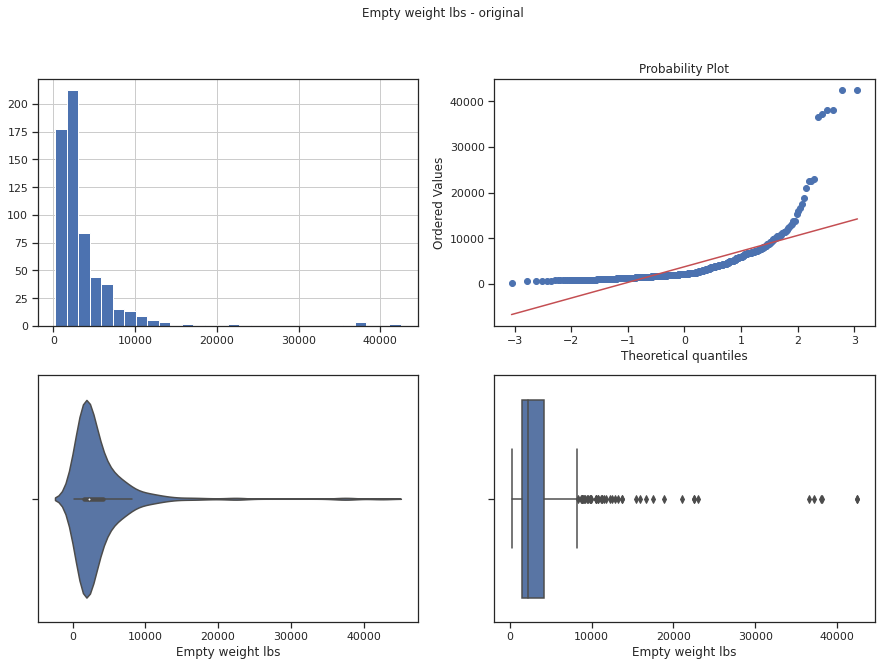

In [ ]:
diagnostic_plots(data, 'Empty weight lbs', 'Empty weight lbs - original')

> Удаление выбросов на основе 5% и 95% квантилей в колонке `Empty weight lbs`:

В результате число выбросов уменьшилось, максимальный выброс в районе `10000` вместо `40000`

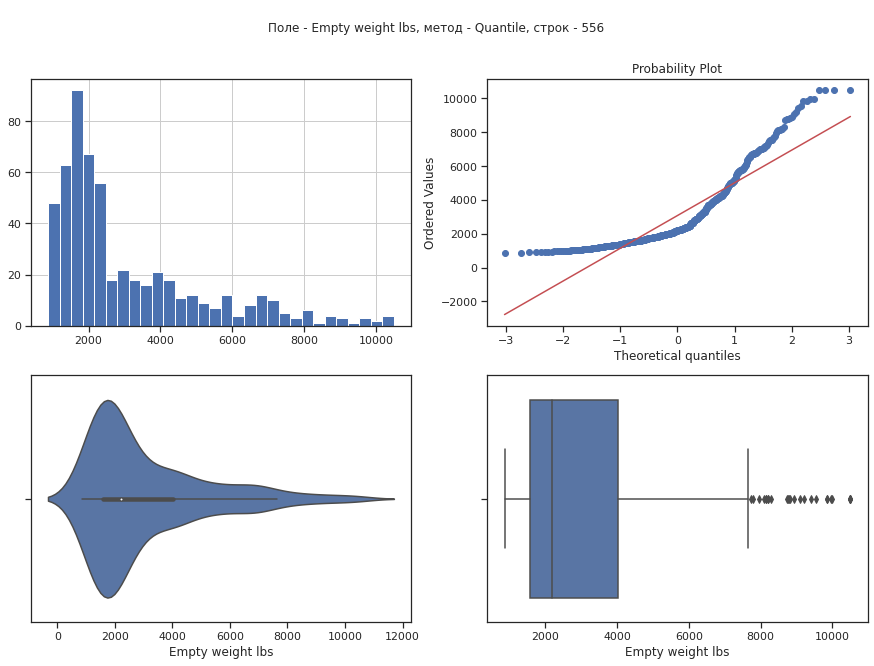

In [ ]:
# Вычисление верхней и нижней границы
lower_boundary = data['Empty weight lbs'].quantile(0.05)
upper_boundary = data['Empty weight lbs'].quantile(0.95)
# Флаги для удаления выбросов
outliers_temp = np.where(data['Empty weight lbs'] > upper_boundary, True, 
                          np.where(data['Empty weight lbs'] < lower_boundary, True, False))
# Удаление данных на основе флага
data_trimmed = data.loc[~(outliers_temp), ]  
title = '\nПоле - {}, метод - {}, строк - {}'.format('Empty weight lbs', 'Quantile', data_trimmed.shape[0])
diagnostic_plots(data_trimmed, 'Empty weight lbs', title)

# Дополнительное задание
Для произвольной колонки данных построить график "Ящик с усами (boxplot)".

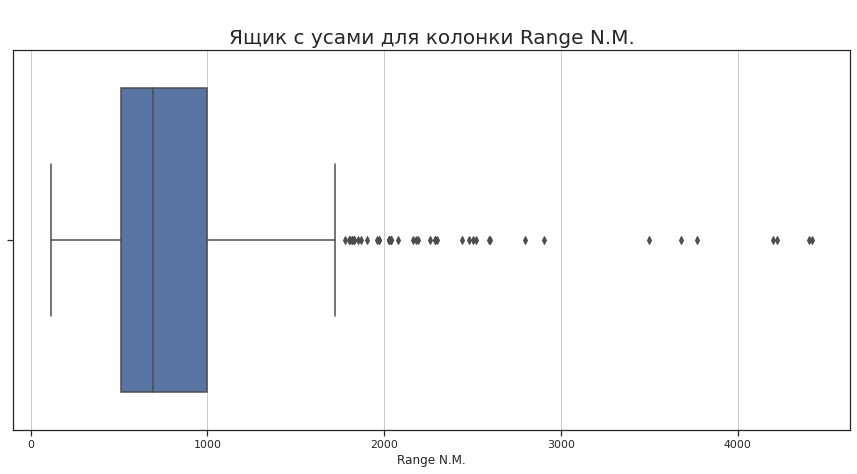

In [ ]:
plt.figure(figsize = (15, 7))
plt.grid()
plt.title('\nЯщик с усами для колонки Range N.M.', {'fontsize' : 20})
sns.boxplot(x = data['Range N.M.']) 